# DATA512 - Final Project: Exploration of Yelp Rating
_Name: Haowen Ni_  
_Date: 12/10/2017_

## Introduction

As a foodie, using Yelp to check out new or popular restaurants is a part of my life, and I believe there are a large number of customers who make their decisions on new restaurants based on the Yelp’s rating system and reviews. When people search restaurants near some specific location, Yelp allows users to sort the search results by three options: best match, highest rated, and most reviewed. Personally, I usually sort my search results by highest rated, but sometimes I feel disappointed about the rating because the Yelp rating was overestimated in my opinion. Even though such experience may not occur very often, these special cases still motivate me to conduct a research on the accuracy and efficacy of Yelp rating system in general.

Thus, this project will present an exploratory data analysis to the Yelp data from the Yelp Dataset Challenge. Specifically, I will focus on the data about restaurant business information and perform a series of correlation analysis to check a) the pairwise relation between the restaurant overall rating and other attribute of the restaurant and b) the pairwise relation among attributes of the restaurant. Through the correlation analysis, I try to understand the mechanism and logic behind the ratings and the reasons for those overestimated or underestimated overall ratings of restaurant in Yelp. 


## Background

### Related work

Yelp has already initiated a project named Yelp Dataset Challenge which encourages students to dig interesting insights of their business dataset. There have been 9 rounds of challenges finished and hundreds of academic papers written using the dataset, which provides me a large amount of inspiration and guidance for my own research on the Yelp rating system. 

For example, there was a past work which pointed out the warm-start bias existed in the Yelp rating. Specifically, the main finding of the paper discovered that ‘the initial reviews that a merchant receives significantly overestimated the merchant’s eventual reputation’. (Potamias, 2012) In addition, a Groupon deal may also lead to lower Yelp ratings because “when merchants put out an offer they get swamped with new customers and quality deteriorates--even though the goal of a daily deal is to get new potential customers who will become loyal.” (See [reference]( http://www.businessinsider.com/how-does-groupon-affect-a-local-merchants-ratings-2011-9)) These phenomena immediately resonates my exploration to the bias in Wikipedia data in assignment 2 of DATA512 and makes me think about other potential bias and shortages that may exist in the current Yelp rating system. 

### Research Question
* Main topic: What are the correlations between restaurant overall rating and varioius restaurant attribute such as price, location, number of reviews etc. ?

In particular, I will study questions like:
1. What are the factors that have larger correlations to rating?
2. Are there any correlations among those restaurant attributes themselves? For example, is there any correlation between price and location of restaurant.

### Hypotheses
* Some aspects of restaurant are more likely to determine the overall rating of restaurant than other attributes.

One possible aspect is the price range of the restaurant. The more expensive the restaurant, the higher the rating in average because the restaurant probably invests more in hiring excellent chef and decorating the environment. It’s also possible that cheap restaurants will have higher ratings because their food are more affordable and not bad as well.

## Data and Methods

All the following exploratory analysis is based on 'business.json' from [Yelp Dataset Challenge](https://www.yelp.com/dataset/challenge). 'business.json' contains the basic information including name, location-related data such as city, neighborhood, address, and etc., attributes of business such as whether the business has parkings, business categories indicating the type of business, and overall rating named as 'stars'. The range of rating(stars) is from 1 to 5 with an increment of 0.5. In this project, I narrowed down the scope of my investigation subjects to **Restaurant**.

The analytical methods I used for this project mainly consist of correlation analysis and exploratory data analysis through visualizations. A large portion of my study involved calculating the correlations between two variables, so correlation analysis intuitively became the best candidate of my analytic methods for this research. After taking a glance at my dataset, I realized that some of the independent variables are quantitative variables such as price range and number of reviews, and the response variable (i.e. overall rating) is ordinal, but some variables such as most attributes of restaurants are categorical, which means it would be better to utilize visualizations like heatmap to show the relation between those categorical variables and overall rating of a restaurant.


In [1]:
import re
import string

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
# Import the business dataset
df_business_raw = pd.read_json('business.json', lines=True)

In [3]:
# Check columns of the business dataset
sorted(list(df_business_raw.columns))

['address',
 'attributes',
 'business_id',
 'categories',
 'city',
 'hours',
 'is_open',
 'latitude',
 'longitude',
 'name',
 'neighborhood',
 'postal_code',
 'review_count',
 'stars',
 'state']

In [4]:
# Filter out columns that I don't need in business dataset
new_columns = [col for col in list(df_business_raw.columns) if \
               col != 'address' and \
               col != 'attributes' and \
               col != 'hours' and \
               col != 'latitude' and \
               col != 'longitude' and \
               col != 'neighborhood' and \
               col != 'postal_code']
df_business_lite = df_business_raw[new_columns]

In [5]:
# Flatten attribute column
attributes_flat = pd.io.json.json_normalize(df_business_raw['attributes'])

In [6]:
# Check columns of the business dataset
sorted(list(attributes_flat.columns))

['AcceptsInsurance',
 'AgesAllowed',
 'Alcohol',
 'Ambience.casual',
 'Ambience.classy',
 'Ambience.divey',
 'Ambience.hipster',
 'Ambience.intimate',
 'Ambience.romantic',
 'Ambience.touristy',
 'Ambience.trendy',
 'Ambience.upscale',
 'BYOB',
 'BYOBCorkage',
 'BestNights.friday',
 'BestNights.monday',
 'BestNights.saturday',
 'BestNights.sunday',
 'BestNights.thursday',
 'BestNights.tuesday',
 'BestNights.wednesday',
 'BikeParking',
 'BusinessAcceptsBitcoin',
 'BusinessAcceptsCreditCards',
 'BusinessParking.garage',
 'BusinessParking.lot',
 'BusinessParking.street',
 'BusinessParking.valet',
 'BusinessParking.validated',
 'ByAppointmentOnly',
 'Caters',
 'CoatCheck',
 'Corkage',
 'DietaryRestrictions.dairy-free',
 'DietaryRestrictions.gluten-free',
 'DietaryRestrictions.halal',
 'DietaryRestrictions.kosher',
 'DietaryRestrictions.soy-free',
 'DietaryRestrictions.vegan',
 'DietaryRestrictions.vegetarian',
 'DogsAllowed',
 'DriveThru',
 'GoodForDancing',
 'GoodForKids',
 'GoodForMeal.b

In [7]:
# Filter out attributes that I don't need
new_attributes = [attr for attr in list(attributes_flat.columns) if \
                  attr != 'AcceptsInsurance' and \
                  attr != 'AgesAllowed' and \
                  attr != 'Caters' and \
                  attr != 'CoatCheck' and \
                  attr != 'BusinessAcceptsBitcoin' and \
                  attr != 'GoodForDancing' and \
                  not re.match('^Music', attr) and \
                  not re.match('^Hair', attr)]
df_attributes_flat = attributes_flat[new_attributes]

In [8]:
# Combine the flattend attributes with business dataset
df_business = pd.concat([df_business_lite, df_attributes_flat],axis=1)
list(df_business.columns)

['business_id',
 'categories',
 'city',
 'is_open',
 'name',
 'review_count',
 'stars',
 'state',
 'Alcohol',
 'Ambience.casual',
 'Ambience.classy',
 'Ambience.divey',
 'Ambience.hipster',
 'Ambience.intimate',
 'Ambience.romantic',
 'Ambience.touristy',
 'Ambience.trendy',
 'Ambience.upscale',
 'BYOB',
 'BYOBCorkage',
 'BestNights.friday',
 'BestNights.monday',
 'BestNights.saturday',
 'BestNights.sunday',
 'BestNights.thursday',
 'BestNights.tuesday',
 'BestNights.wednesday',
 'BikeParking',
 'BusinessAcceptsCreditCards',
 'BusinessParking.garage',
 'BusinessParking.lot',
 'BusinessParking.street',
 'BusinessParking.valet',
 'BusinessParking.validated',
 'ByAppointmentOnly',
 'Corkage',
 'DietaryRestrictions.dairy-free',
 'DietaryRestrictions.gluten-free',
 'DietaryRestrictions.halal',
 'DietaryRestrictions.kosher',
 'DietaryRestrictions.soy-free',
 'DietaryRestrictions.vegan',
 'DietaryRestrictions.vegetarian',
 'DogsAllowed',
 'DriveThru',
 'GoodForKids',
 'GoodForMeal.breakfast',

In [9]:
# Filter out businesses that are not restaurants and still open
ind_want = []
for ind, row in df_business.iterrows():
    if 'Restaurants' in row['categories']:
        ind_want.append(ind)
df_restaurant = df_business.iloc[ind_want, :]

In [10]:
# Take a glance at restaurant dataset
df_restaurant.head()

,business_id,categories,city,is_open,name,review_count,stars,state,Alcohol,Ambience.casual,...,RestaurantsCounterService,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsPriceRange2,RestaurantsReservations,RestaurantsTableService,RestaurantsTakeOut,Smoking,WheelchairAccessible,WiFi
1,mLwM-h2YhXl2NCgdS84_Bw,"[Food, Soul Food, Convenience Stores, Restaura...",Charlotte,0,South Florida Style Chicken & Ribs,4,4.5,NC,NaN,False,...,NaN,True,True,2.0,False,NaN,True,NaN,NaN,NaN
4,duHFBe87uNSXImQmvBh87Q,"[Sandwiches, Restaurants]",Phoenix,0,Blimpie,10,4.5,AZ,none,False,...,NaN,False,True,1.0,False,False,True,NaN,NaN,no
14,SDMRxmcKPNt1AHPBKqO64Q,"[Burgers, Bars, Restaurants, Sports Bars, Nigh...",Matthews,1,Applebee's,21,2.0,NC,full_bar,False,...,NaN,False,True,2.0,False,False,True,NaN,NaN,free
15,iFEiMJoEqyB9O8OUNSdLzA,"[Chinese, Restaurants]",Stanley,1,China Garden,3,3.0,NC,none,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,HmI9nhgOkrXlUr6KZGZZew,"[Sandwiches, Restaurants, Italian, Diners, Bre...",Pittsburgh,1,Rocky's,15,3.0,PA,none,False,...,NaN,False,False,1.0,False,True,True,NaN,NaN,no


## Findings

### 1. The restaurant overall rating appears to be normal

From the graph below, you can see that the mode of rating is at 4, and the main proportion of the ratings is from 3 to 4.5. This makes sense as the distribtuion matches the fact that restaurants that are extremely perfect or bad are rare in real life. 

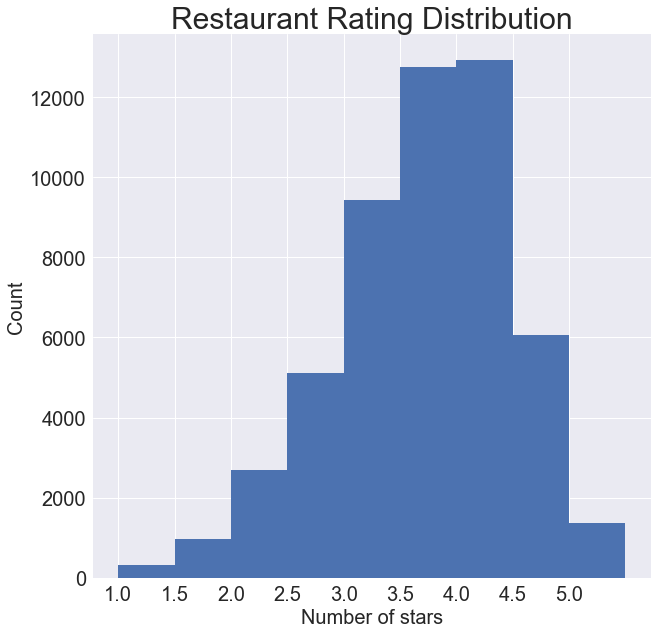

In [11]:
# Check the overall rating distribution of all restaurants
fig= plt.figure(figsize=(10, 10))
plt.hist(df_restaurant['stars'], bins=np.arange(1,6,0.5))
plt.xlabel('Number of stars', fontsize = 20)
plt.xticks(np.arange(1,5.5,0.5), fontsize=20)
plt.ylabel('Count', fontsize = 20)
plt.yticks(fontsize=20)
plt.title('Restaurant Rating Distribution', fontsize=30)

### 2. Some attributes of restaurant barely have correlation (i.e. correlation coefficient is between 0.3 and -0.3) with restaurant overall rating

From the list of correlation coefficients displayed below, all of the chosen attributes have a correlation between -0.3 and 0.3 with restaurant overall rating. Most of attributes have very weak positive correlations with rating, and only 9 out of 62 attributes have negative correlations with rating. In the result I got, the strongest positive correlation exists between the attribute about street parking and restaurant rating, and the strongest negative correaltion exists between the attribute about drive through and restaurant rating.

In [12]:
# Collect columns needed for correlation calculation and visualization
cor_cols = [col for col in list(df_restaurant.columns) if \
            col not in ['business_id','categories','city',
                        'is_open','name', 'state']]

# Input for correlation matrix
df_corr_mat = df_restaurant[cor_cols] 

# Replace NA values with 0, False with -1, and True with 1 so that we can run correlation calculations
df_corr_mat = df_corr_mat.replace(['NaN', 'none', None, False, True], [0, 0, 0, -1, 1])

# Calculated pairwise correlation
corr = df_corr_mat.corr()

# Display the correlation coefficients between rating and other attribute
corr = corr.sort_values('stars')
corr['stars']

DriveThru                         -0.233677
BusinessAcceptsCreditCards        -0.053220
GoodForMeal.latenight             -0.032069
Ambience.touristy                 -0.029171
RestaurantsTakeOut                -0.021144
Open24Hours                       -0.010152
GoodForKids                       -0.009384
RestaurantsDelivery               -0.009073
BestNights.tuesday                -0.000353
BestNights.monday                  0.000808
HappyHour                          0.001385
DietaryRestrictions.soy-free       0.006273
BestNights.wednesday               0.007395
DietaryRestrictions.kosher         0.007464
GoodForMeal.breakfast              0.008396
DietaryRestrictions.halal          0.008568
DietaryRestrictions.gluten-free    0.008669
RestaurantsCounterService          0.009365
DietaryRestrictions.dairy-free     0.009542
BusinessParking.garage             0.009793
BYOB                               0.010851
ByAppointmentOnly                  0.011528
BestNights.sunday               

In [13]:
# Function for plotting correlation heatmap
def plot_corr(df,size=20,save=False):
    corr = df.corr()
    fig= plt.subplots(figsize=(size, size))
    corr_mat_plot = sns.heatmap(corr)
    if save:
        plt.savefig('output.png')

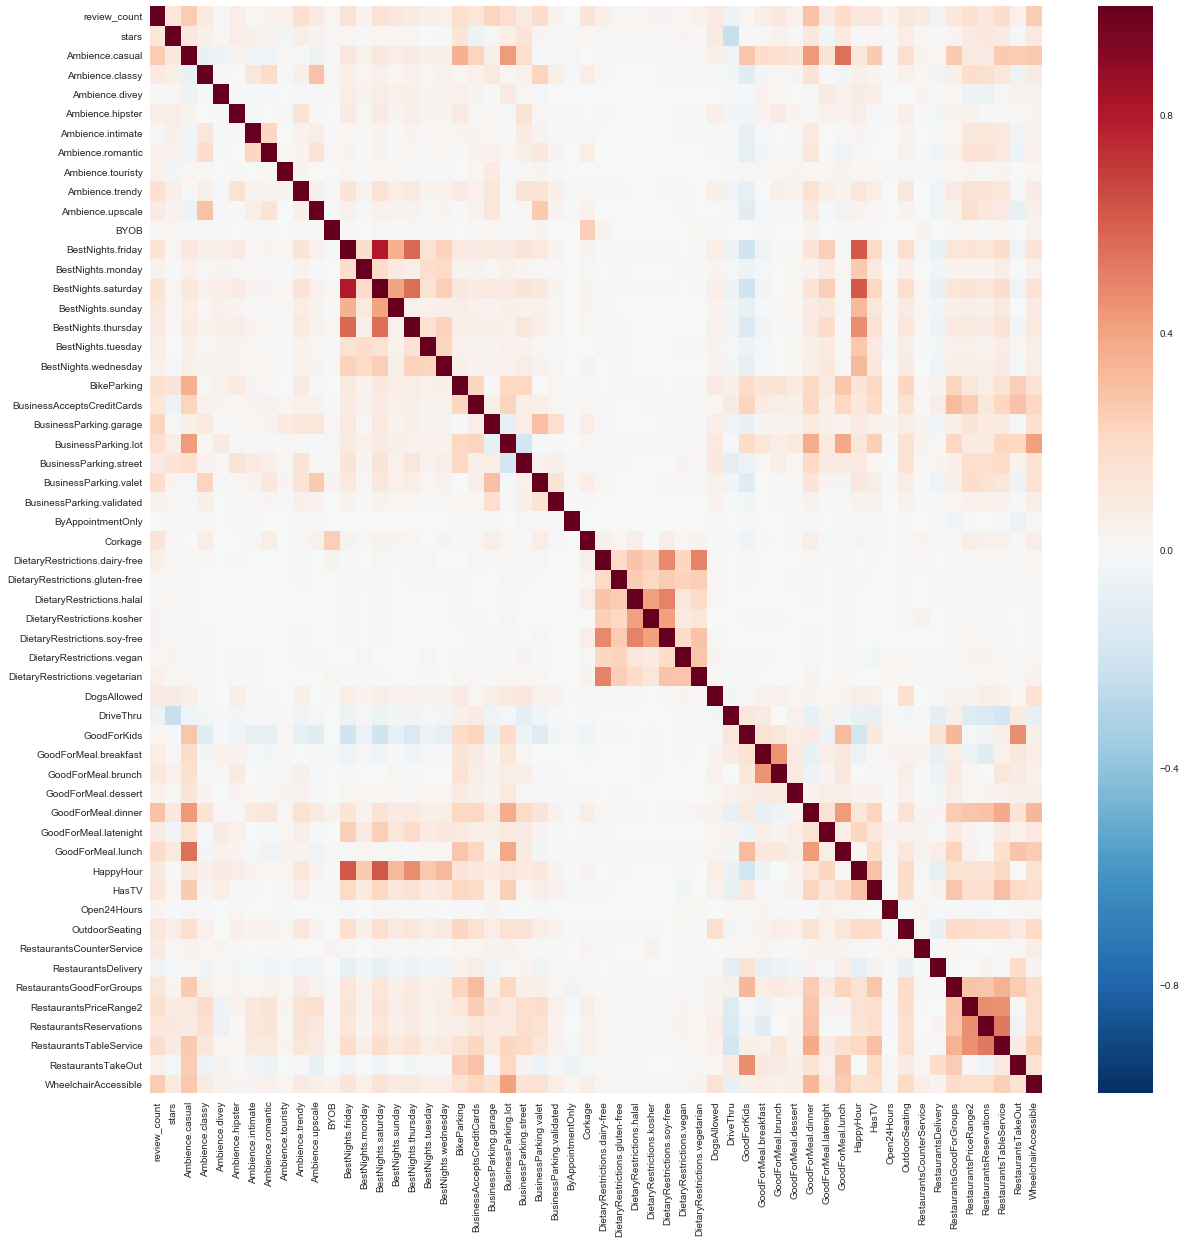

In [14]:
# Plot the correlation heatmap
plot_corr(df_corr_mat, 20)

### 3. The data sampling is not balanced

I looked at the rating distribution of restaurant with attributes that are top 2 strongest positive correlation with rating, and I discovered that
1. In the Yelp business dataset, there are way more (i.e. at least double of the amount) restaurants without street parking than those with street parking. 
2. In the Yelp business dataset, there are way more restaurants with bike parking than more restaurants without bike parking.


In [16]:
def plot_hist(attr):
    df_restaurant.groupby([attr, 'stars']).size()
    cor_list = df_restaurant.groupby([attr, 'stars']).size().tolist()
    ratings = [1,1.5,2,2.5,3,3.5,4,4.5,5]
    
    fig, ax= plt.subplots(figsize=(10, 10))
    plt.bar(ratings, cor_list[0:9],width=0.5)
    plt.xlabel('Number of stars', fontsize = 20)
    plt.xticks(fontsize=20)
    plt.ylabel('Count', fontsize = 20)
    plt.yticks(fontsize=20)
    plt.title('Rating distribution for restaurants without ' + attr, fontsize=30)

    fig, ax= plt.subplots(figsize=(10, 10))
    plt.bar(ratings, cor_list[9:],width=0.5)
    plt.xlabel('Number of stars', fontsize = 20)
    plt.xticks(fontsize=20)
    plt.ylabel('Count', fontsize = 20)
    plt.yticks(fontsize=20)
    plt.title('Rating distribution for restaurants with ' + attr, fontsize=30)

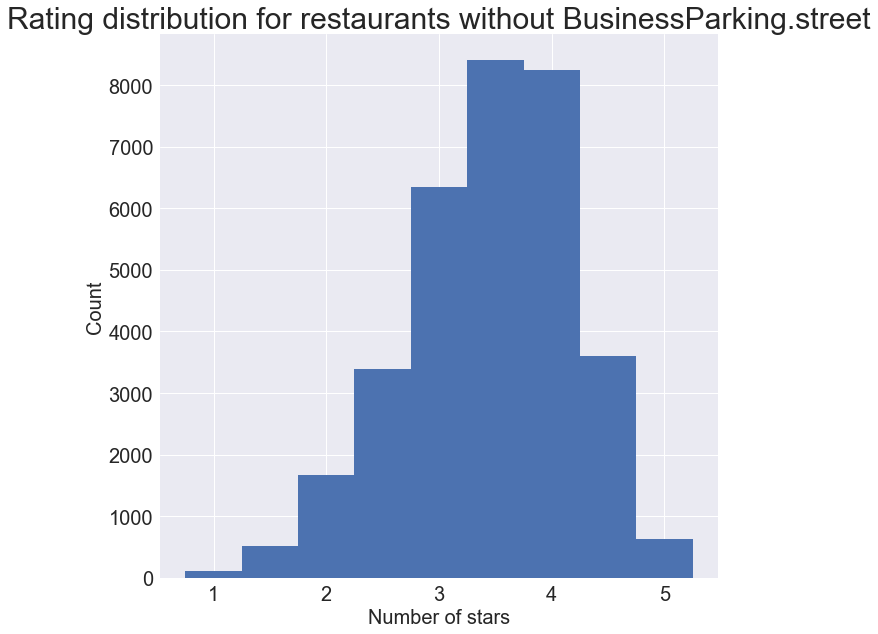

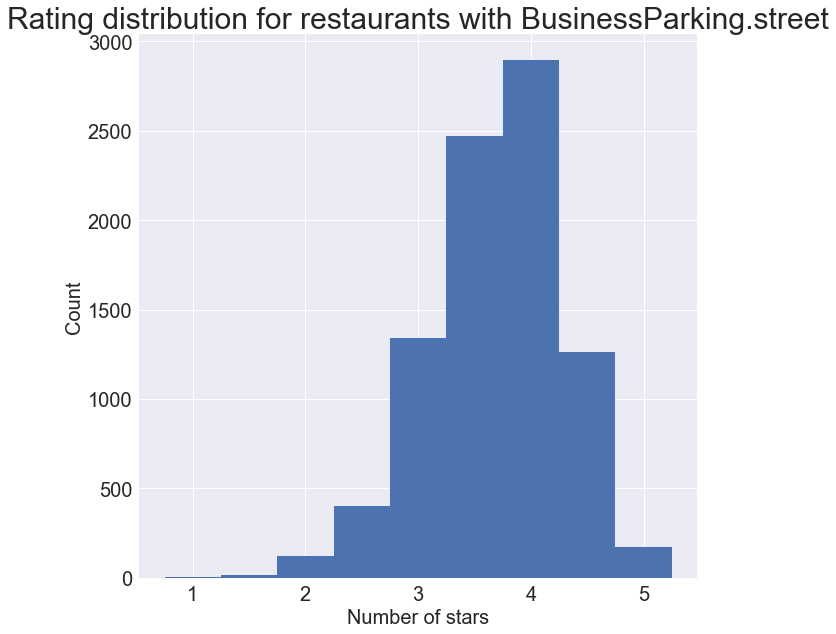

In [17]:
plot_hist('BusinessParking.street')

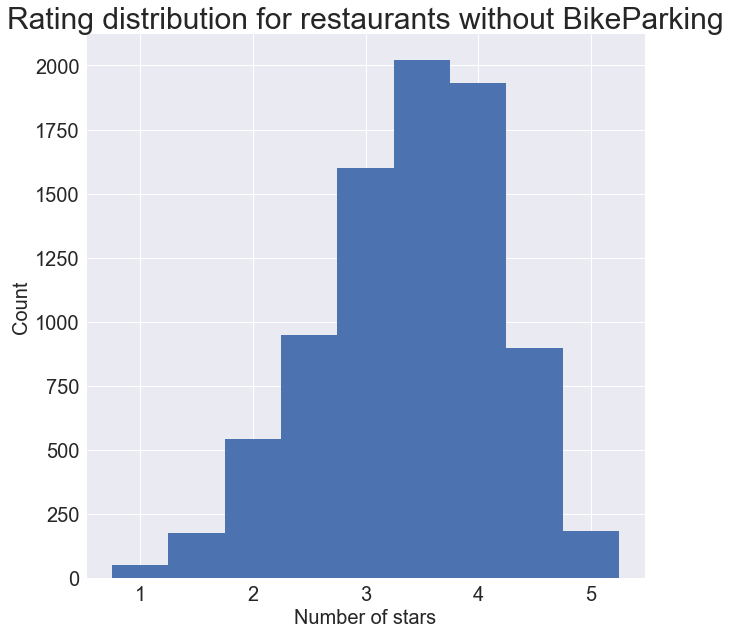

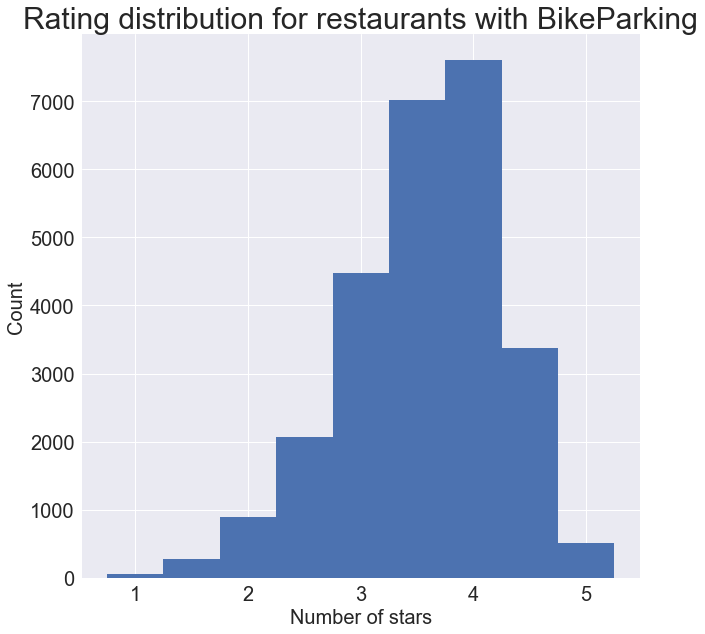

In [18]:
plot_hist('BikeParking')

### 4. Some attirbutes that have negative correlation with restaurant rating are actually providing customers convenience and benefit.

If we look at the attributes that have negative correlation with restaurant rating, we can see some of them are actually beneficial to customers such as drive thru, restaurant take-out, and open-24-hours.

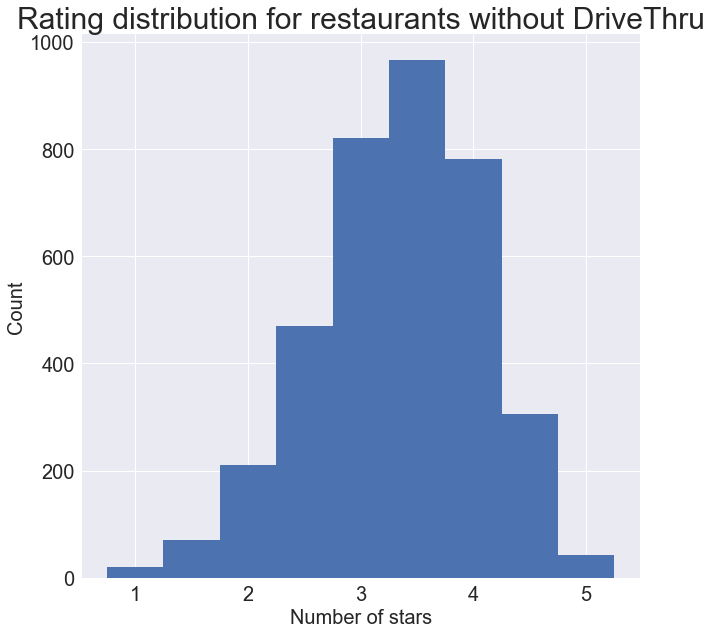

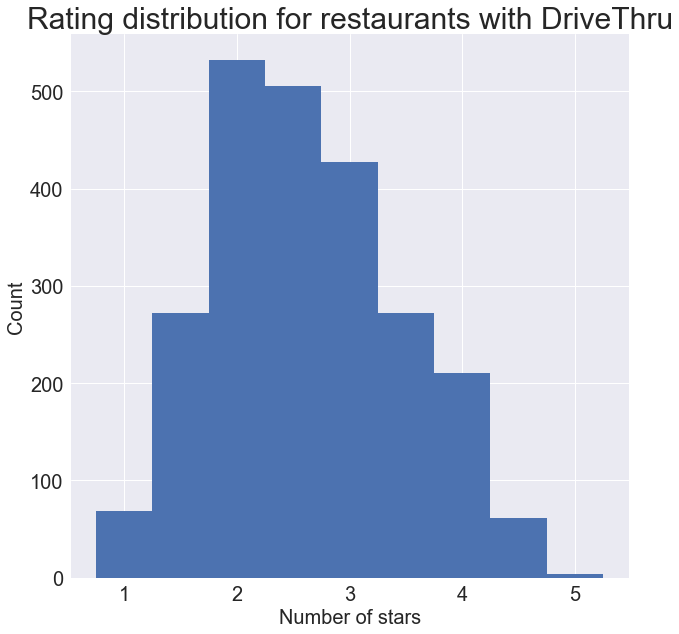

In [20]:
plot_hist('DriveThru')

## Implications of Findings:

First, I want to point out that correlations between most attributes of restaurant and overall rating are very weak in this project. The reason could be the influence of null values for attributes. Replacing the null values with 0 was adopted in this project, but such strategy will skew the result of correlation analysis to some extents because a lot time the majority of column consist of null values.

Another point about the dataset is that for most attributes in this project, the values binary. More importantly, we saw some unbalanced data like the number of restaurant with bike parking in the Yelp business dataset is way more than that of restaurant without bike parking. Such unbalanced data sampling could also twist the result of correlation analysis and generate biased result because correlation analysis works best when there is a normally distributed dataset. 

The major finding of my project is that Yelp ratings may suffer from bias due to stereotype or customers' psychological suggestions. This implication was obtained from the finding that some restaurant attirbutes that are beneficial to customers have negative correlation with restaurant rating. If we consider those attributes (drive thru, restaurant take-out, and open-24-hours), we can deduce that those are characteristics of fast-food restaurant or cafeteria. The reasons that rating tends to be lower for these restaurants could be various, but according to the result of correlation analysis performed in this project, attributes with strongest negative correlation like drive thru, restaurant take-out, and open-24-hours cannot be direct reasons for bad ratings because they do no harm for customers. Thus, there must be some aspects other than those attributes with strongest negative correlation with rating contributing to the bad rating.

## Conclusion
In this project, we saw an exploratory data analysis to the Yelp data from the Yelp Dataset Challenge by using correlation analysis and visualizations. The research question is about finding correlations between restaurant overall rating and varioius restaurant attributes. My hypotheses was verified that some aspects of restaurant are more likely to determine the overall rating of restaurant than other attributes, but most attributes barely have correlation (i.e. correlation coefficient is between 0.3 and -0.3) with restaurant overall rating. This might be due to the large amount of null values in the dataset and unbalanced data. In genearl, the Yelp rating appears to be normal distributed, but we do need to be cautious when interpreting the restaurant rating because Yelp ratings may suffer from bias due to stereotype or customers' psychological suggestions.

## Reference
1. Yelp Dataset Challenge, available at:https://www.yelp.com/dataset/documentation/json
2. M. Potamias, The warm-start bias of Yelp rating, arXiv:1202.5713, 2012
3. How Does Groupon Affect A Local Merchant's Yelp Ratings?, available at http://www.businessinsider.com/how-does-groupon-affect-a-local-merchants-ratings-2011-9